# Advanced Lane Finding

## Finding corners

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [22]:
calibration_path = './camera_cal'

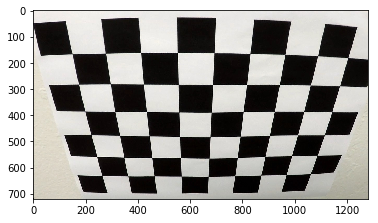

In [46]:
# Read in calibration image
img = mpimg.imread(calibration_path + '/calibration2.jpg')
plt.imshow(img)

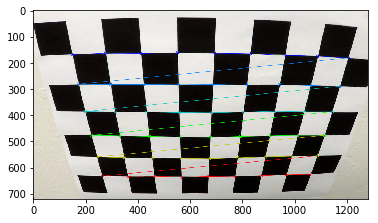

In [47]:
# Arrayys to store object points and image points form all images

nx = 9 # number of corners in x
xy = 6 # number of corners in y

obj_points = [] # 3D points in real world space
img_points = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ..., (7,5,0)
obj_p = np.zeros((ny*nx, 3), np.float32)
obj_p[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

# If corers are found, add objects points, image points
if ret == True:
    img_points.append(corners)
    obj_points.append(obj_p)
    
    # draw and display corners
    img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    plt.imshow(img)

### Iterate through all calibration images

In [49]:
import glob

In [50]:
images = glob.glob(calibration_path + '/calibration*.jpg')

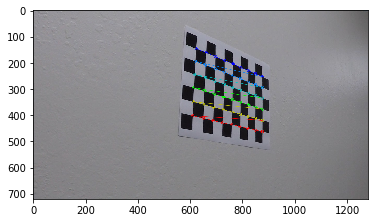

In [51]:
for fname in images:
    # read each mage
    img = mpimg.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If corers are found, add objects points, image points
    if ret == True:
        img_points.append(corners)
        obj_points.append(obj_p)

        # draw and display corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.imshow(img)

## Correction for Distortion